In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('bmh')
sns.set_style({'axes.grid': False})
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode 
import plotly.graph_objs as go 
init_notebook_mode(connected = True)

import warnings as wrn 
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)

In [3]:
df_train = pd.read_csv("train.csv", keep_default_na = False)
df_test = pd.read_csv("test.csv", keep_default_na = False)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [10]:
# Dimensions of train and test data
print("Dimensions of train data:", df_train.shape)
print("Dimensions of test data:", df_test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [11]:
# Check column names
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [17]:
# Extract target column from training data:
Y = df_train[["SalePrice"]]
# Extract training data:
X = df_train.drop("SalePrice", axis = 1)
X = X.drop(["Id", "YearBuilt"], axis = 1)


KeyError: "['Id, YearBuilt'] not found in axis"

In [16]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [24]:
# Merging train - test data, inspecting data type
merged = pd.concat([df_train, df_test], axis = 0, sort = True)
# Counting unique values per category of data types
display(merged.dtypes.value_counts())
print("Dimensions of overall data:", merged.shape)


object     43
int64      26
float64    12
dtype: int64

Dimensions of overall data: (2919, 81)


In [29]:
# Extract numerical columns
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print("\n")
display(num_merged.columns.values)



,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [47]:
# Plot histogram of numerical columns to validate pandas intuition
def draw_histograms(df, vars, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(vars):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins = 40, ax=ax, color="red", alpha = 0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = "both", which = "major", labelsize = 35)
        ax.tick_params(axis = "both", which = "minor", labelsize=35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.3, 1, 0.95])
    plt.show()




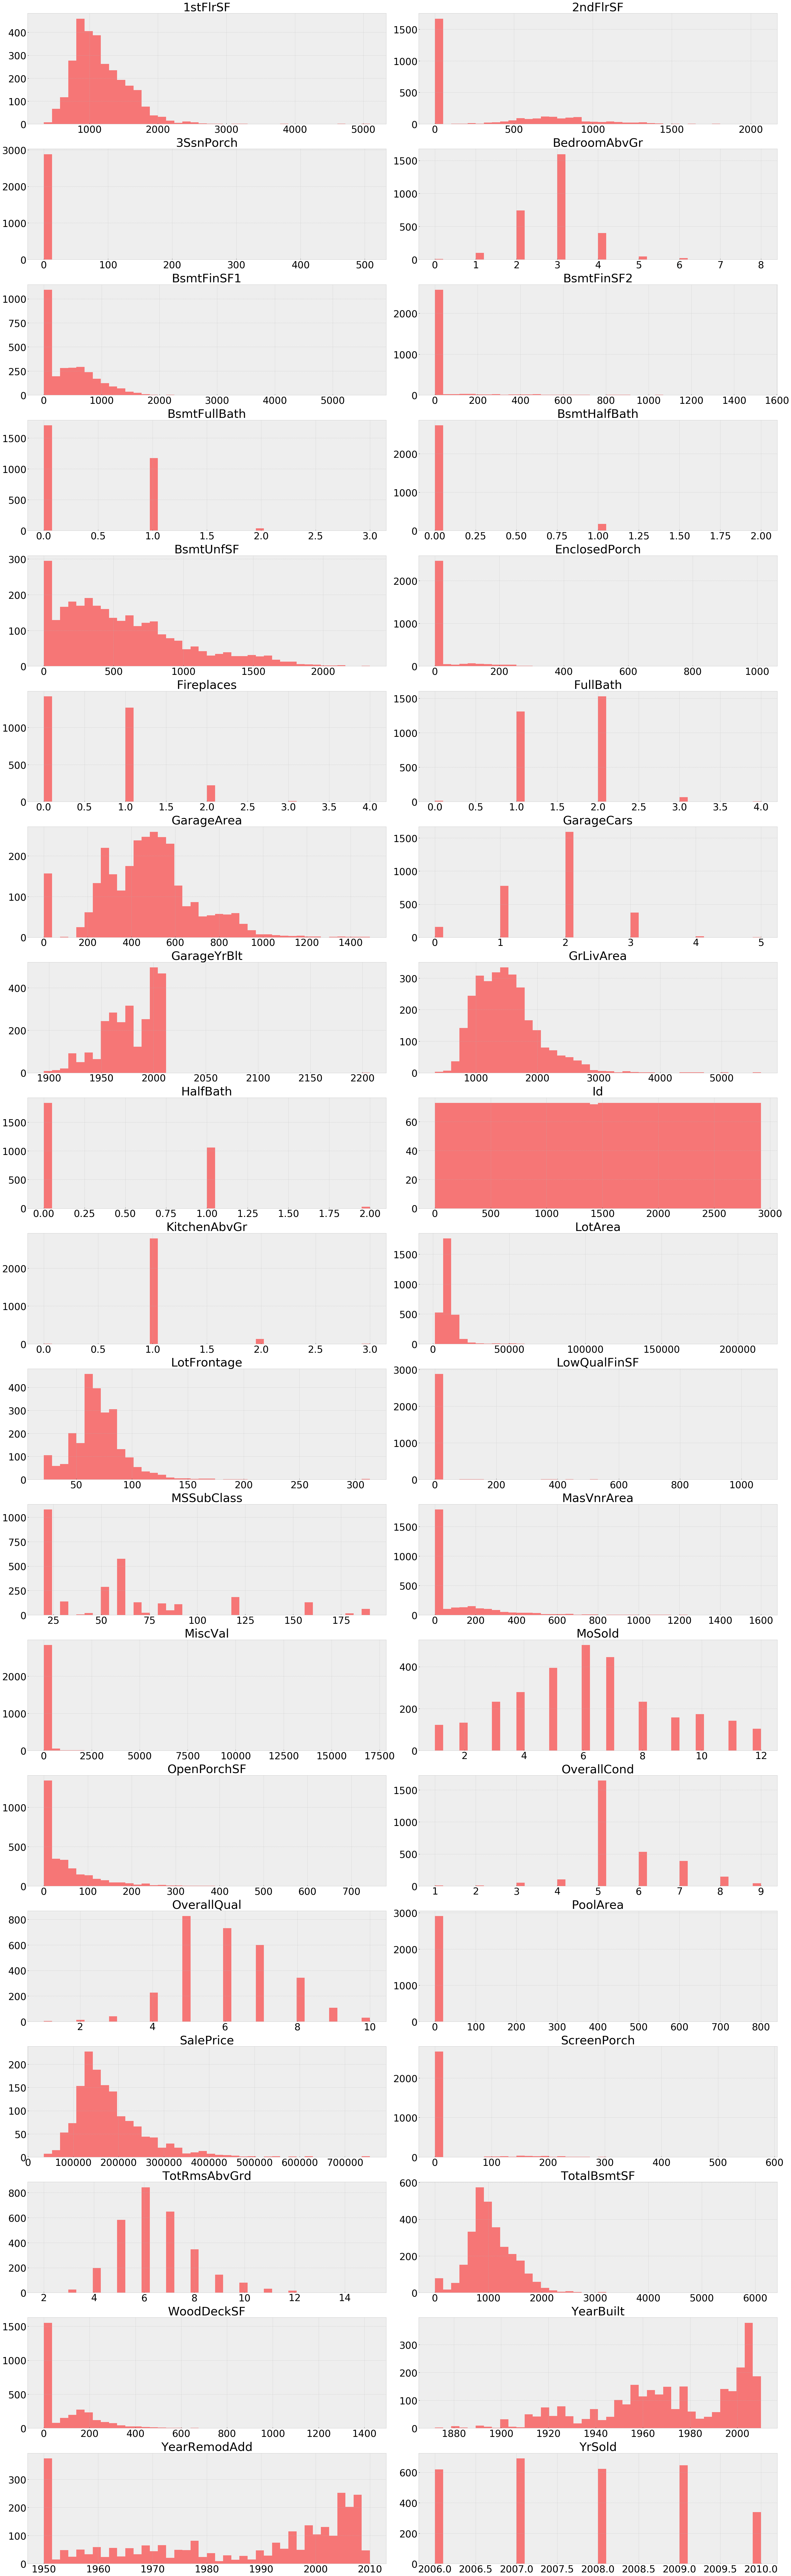

In [48]:
draw_histograms(num_merged, num_merged.columns, 19, 2)

There are 2 types of numerical columns:
- Continuous (eg: LotFrontage, LotArea, YearBuilt)
- Discrete (eg: MSSubClass, OverallQual, OverallCond, BsmtFullBath, HalfBath, etc.)
- Some variables are actual categorical (eg MSSubClass, OverallQual, OverallCond)

In [51]:
# Converting MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables
merged.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype("object")

In [54]:
# Check data types after conversion
merged.dtypes.value_counts()

object     48
int64      21
float64    12
dtype: int64

Functions to create plotly plots

In [55]:
# Function to plot scatter plot
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x, y = y, mode = "markers", marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = "closest", title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# Function to plot bar chart:
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x = x, y = y, marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode = "closest", title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# Function to plot histogram:
def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x = x, marker = dict(color = color))
    layout = go.Layout(hovermode = "closest", title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)


### Checking Assumptions:
4 assumptions should be tested:
- Normality: Data should look like a normal distribution. This is important since there are many statistical tests that rely on normality of data (e.g t-statistics). We're going to check univariate normality for target variable "SalePrice". Even though we can't ensure multivariate normality with this approach, it helps. Also, in such a big sample (>200 observations), normality is normally not such an issue.

- Homoscedasticity: This is the assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). We ideally want the error term to be the same across all values of the independent variables

- Linearity: Most commonly done by examining scatter plots and search for linear patterns. If patterns are non-linear, should explore data transformations. Most scatter plots we've seen so far appear to have linear relationships, so we're good to go.

- Absence of correlated errors (Multicollinearity): This happens when one error is correlated to another. For example, if one positive error makes a negative error systematically, there's a relationship between these variables. Often occurs in time series, where some patterns are time related. Solution: Add a variable that can explain the effect you're getting

### Correlation Matrix

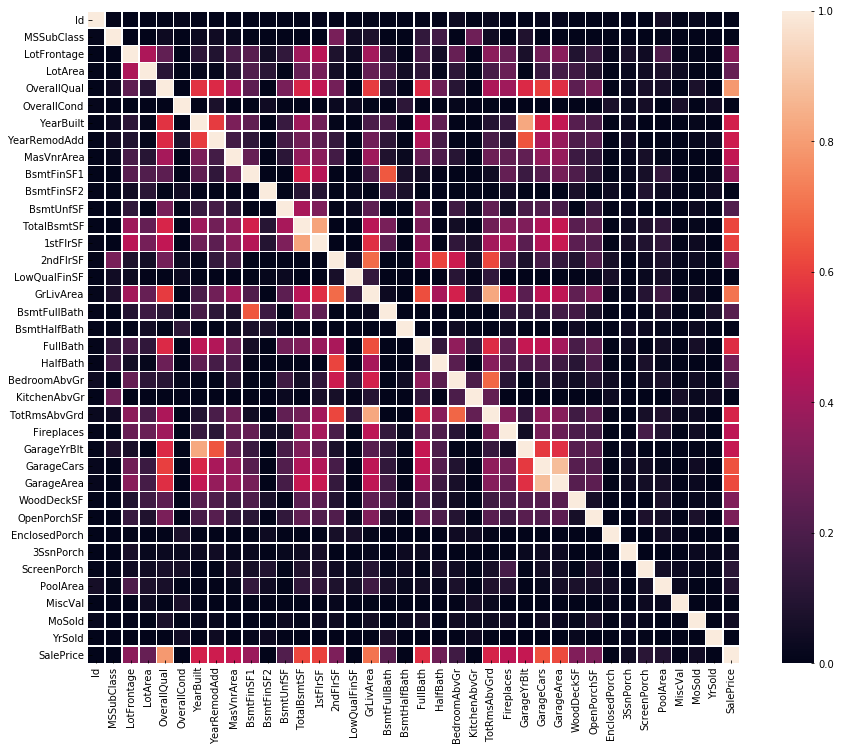

In [58]:
corr = df_train.corr()
f, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(corr, linewidths=.5, vmin = 0, vmax = 1, square = True)

From the heatmap, we can see stronger correlation between "SalePrice" (dependent variable) and independent variables such as "OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars", "GarageArea"

## "SalePrice" correlation matrix

In [64]:
k = 10 # number of variables for heatmap
cols = corr.nlargest(k, "SalePrice")["SalePrice"].index

In [71]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, )

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116